# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

Используя скрипт parser.py получаем сообщения из чата в формате csv - chat.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chats_df = pd.read_csv('chats.csv')

In [3]:
chats_df.head()

,message,date
0,Народные отчеты о вакцинации\r\n\r\n⚠️ ТОЛЬКО ...,2023-01-05 21:00:00+00:00
1,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,2023-01-02 06:30:00+00:00
2,"Ж, 20 лет, умеренный аллергик. Сделала Спутник...",2023-01-02 00:32:16+00:00
3,"M40, без хронических болезней, в феврале 2022 ...",2022-12-31 19:53:12+00:00
4,"#ревак #назально #спутник\r\n\r\nЖ53, ковидом ...",2022-12-31 14:06:17+00:00


Переводим в формат даты

In [4]:
chats_df.date = pd.to_datetime(chats_df.date).dt.date

удаляем объекты типа Nan

In [5]:
chats_df = chats_df.dropna()
chats_df

,message,date
0,Народные отчеты о вакцинации\r\n\r\n⚠️ ТОЛЬКО ...,2023-01-05
1,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,2023-01-02
2,"Ж, 20 лет, умеренный аллергик. Сделала Спутник...",2023-01-02
3,"M40, без хронических болезней, в феврале 2022 ...",2022-12-31
4,"#ревак #назально #спутник\r\n\r\nЖ53, ковидом ...",2022-12-31
...,...,...
31672,"Есть примеры, уже появлялись",2020-12-09
31673,Если денег не жалко,2020-12-09
31674,Не рано?,2020-12-09
31675,Через 2 недели обычно сдают,2020-12-09


График числа сообщений по датам

In [6]:
a = chats_df.groupby('date').count()

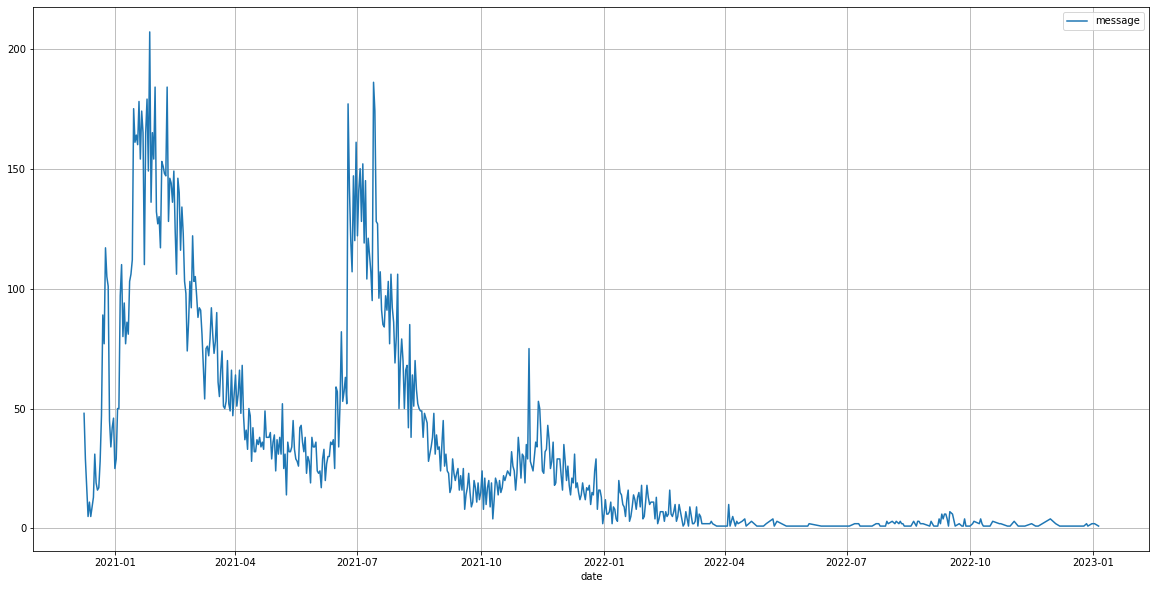

In [7]:
a.plot(figsize=(20,10))
plt.grid()

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

In [8]:
import re

In [143]:
def age_and_sex(inp_str):
    q1 = re.search(r'(Ж|М|M)(,|.)\s*\d+',inp_str)
    q2 = re.search(r'(Жен|Муж)(,|.)\s*\d+',inp_str)
    q3 = re.search(r'(Женщина|Мужчина)(,|.)\s*\d+',inp_str)
    ans = q1 or q2 or q3
    if ans is None:
        return (None,None)
    else:
        ans = ans.group(0)
        age = int(re.search(r'\d+',ans).group(0))
        if age >100:
            return(None,None)
        if ans[0]=='M':
            return('М',age)
        else:
            return (ans[0],age)

In [144]:
chats_df['sex'],chats_df['age'] =  zip(*chats_df['message'].map(age_and_sex))

In [145]:
chats_df[:20]

,message,date,sex,age,headache,BAU
0,Народные отчеты о вакцинации\r\n\r\n⚠️ ТОЛЬКО ...,2023-01-05,None,NaN,Головной боли не было,NaN
1,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,2023-01-02,None,NaN,Головной боли не было,NaN
2,"Ж, 20 лет, умеренный аллергик. Сделала Спутник...",2023-01-02,Ж,20.0,Головной боли не было,NaN
3,"M40, без хронических болезней, в феврале 2022 ...",2022-12-31,М,40.0,Головной боли не было,NaN
4,"#ревак #назально #спутник\r\n\r\nЖ53, ковидом ...",2022-12-31,Ж,53.0,Головной боли не было,504.94
5,"Пол, возраст, наличие хр.заболеваний укажите, ...",2022-12-28,None,NaN,Головной боли не было,NaN
6,Конвасэл до сих пор не даёт полноценный QR код...,2022-12-27,None,NaN,Головной боли не было,NaN
7,Dima32 Данный чат предназначен только для отчё...,2022-12-27,None,NaN,Головной боли не было,NaN
8,#назально #ревак #спутник-V\r\nМ33. 1 комп.: л...,2022-12-25,М,33.0,Была головная боль,NaN
9,"#ревак #назально первый этап 12.09, второй эт...",2022-12-23,None,NaN,Головной боли не было,NaN


Столбцовые диаграммы распределения участников чата по полу

In [146]:
sex_repr = chats_df[chats_df['sex']!=None].groupby('sex').count()

In [147]:
sex_repr['message']

sex
Ж    9626
М    6329
Name: message, dtype: int64

<AxesSubplot:xlabel='sex'>

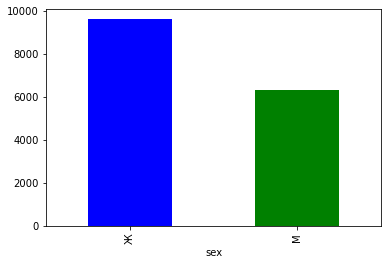

In [148]:
sex_repr['message'].plot.bar(color=['b','g'])

Распределение участников чата по возрасту

In [149]:
age_repr = chats_df[chats_df['age']!=None].groupby('age').count()

<AxesSubplot:xlabel='age'>

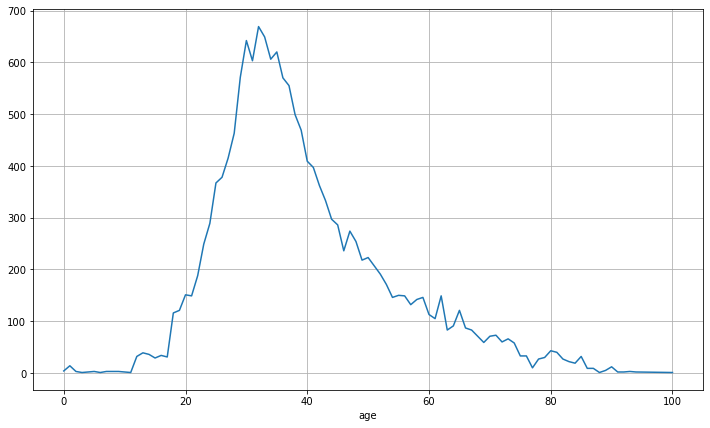

In [150]:
age_repr['message'].plot(figsize=[12,7],grid='True')

Была ли у человека головная боль?

In [151]:
def find_headache(message):
    q1 = re.search(r'(г|Г)оловная боль',message)
    if q1:
        return ('Была головная боль')
    else:
        return('Головной боли не было')
        

In [152]:
chats_df['headache'] = chats_df['message'].map(find_headache)

In [153]:
chats_df

,message,date,sex,age,headache,BAU
0,Народные отчеты о вакцинации\r\n\r\n⚠️ ТОЛЬКО ...,2023-01-05,None,NaN,Головной боли не было,NaN
1,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,2023-01-02,None,NaN,Головной боли не было,NaN
2,"Ж, 20 лет, умеренный аллергик. Сделала Спутник...",2023-01-02,Ж,20.0,Головной боли не было,NaN
3,"M40, без хронических болезней, в феврале 2022 ...",2022-12-31,М,40.0,Головной боли не было,NaN
4,"#ревак #назально #спутник\r\n\r\nЖ53, ковидом ...",2022-12-31,Ж,53.0,Головной боли не было,504.94
...,...,...,...,...,...,...
31672,"Есть примеры, уже появлялись",2020-12-09,None,NaN,Головной боли не было,NaN
31673,Если денег не жалко,2020-12-09,None,NaN,Головной боли не было,NaN
31674,Не рано?,2020-12-09,None,NaN,Головной боли не было,NaN
31675,Через 2 недели обычно сдают,2020-12-09,None,NaN,Головной боли не было,NaN


<AxesSubplot:>

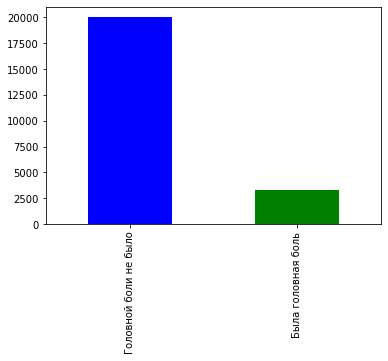

In [164]:
chats_df['headache'].value_counts().plot.bar(color=['b','g'])

Число антител в зависимости от возраста

In [155]:
def BAU(message):
    q = re.search(r'\d+(.|,)\d*\s(BAU|(B|b)au|(Б|б)ау)',message)
    
    if q:
        ans = re.sub(',','.',q.group(0).split(' ')[0])
        if re.search(r'\*',ans):
            return None
        if re.search(r'-',ans):
            ans = ans.split('-')
            ans = (float(ans[1])-float(ans[0]))/2
        elif re.search(r'\+',ans):
            ans = re.sub('\+','',ans)
        return float(ans)
    else:
        return None

In [156]:
chats_df['BAU'] = chats_df['message'].map(BAU)

In [157]:
chats_df[:20]

,message,date,sex,age,headache,BAU
0,Народные отчеты о вакцинации\r\n\r\n⚠️ ТОЛЬКО ...,2023-01-05,None,NaN,Головной боли не было,NaN
1,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...,2023-01-02,None,NaN,Головной боли не было,NaN
2,"Ж, 20 лет, умеренный аллергик. Сделала Спутник...",2023-01-02,Ж,20.0,Головной боли не было,NaN
3,"M40, без хронических болезней, в феврале 2022 ...",2022-12-31,М,40.0,Головной боли не было,NaN
4,"#ревак #назально #спутник\r\n\r\nЖ53, ковидом ...",2022-12-31,Ж,53.0,Головной боли не было,504.94
5,"Пол, возраст, наличие хр.заболеваний укажите, ...",2022-12-28,None,NaN,Головной боли не было,NaN
6,Конвасэл до сих пор не даёт полноценный QR код...,2022-12-27,None,NaN,Головной боли не было,NaN
7,Dima32 Данный чат предназначен только для отчё...,2022-12-27,None,NaN,Головной боли не было,NaN
8,#назально #ревак #спутник-V\r\nМ33. 1 комп.: л...,2022-12-25,М,33.0,Была головная боль,NaN
9,"#ревак #назально первый этап 12.09, второй эт...",2022-12-23,None,NaN,Головной боли не было,NaN


<AxesSubplot:title={'center':'Average BAU by age'}, xlabel='age'>

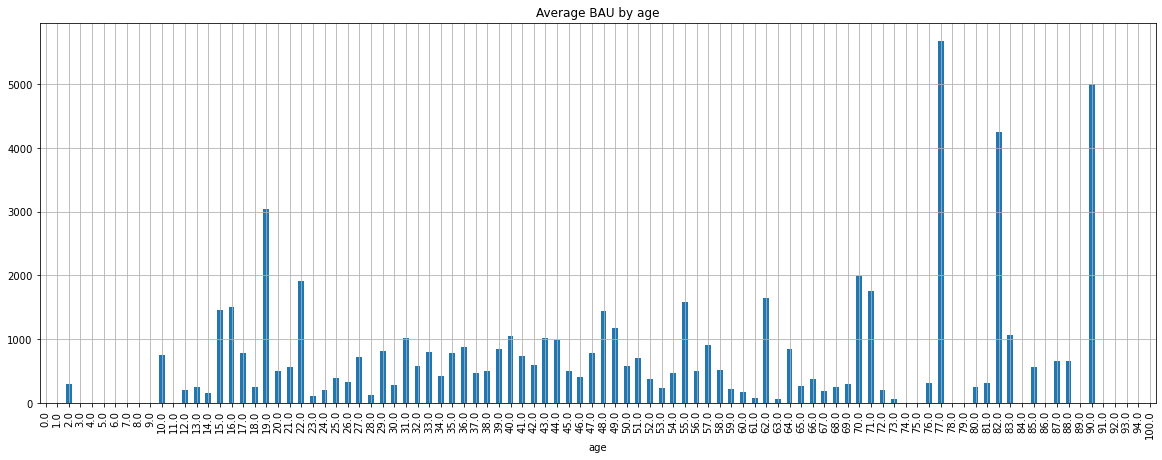

In [167]:
chats_df[chats_df['age']!=None].groupby('age')['BAU'].mean(numeric_only=True).plot(
    kind='bar',figsize=(20,7),title = 'Average BAU by age',grid = True)